In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import wrangle

In [5]:
df = wrangle.wrangle_zillow()

In [49]:
df.taxamount.value_counts()

345.72      170
344.18       75
343.52       72
49.18        45
388.18       37
           ... 
6335.63       1
8186.79       1
444.60        1
2835.57       1
13494.52      1
Name: taxamount, Length: 874046, dtype: int64

In [51]:
df[df['taxamount'] == 345.72]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
30415,4,2.0,1810.0,79645.0,1962,345.72,6059
51565,3,2.0,1700.0,114495.0,1967,345.72,6059
72762,4,2.5,2430.0,97548.0,1973,345.72,6059
73073,5,4.0,2339.0,171612.0,1968,345.72,6059
83969,4,2.5,1988.0,73592.0,1969,345.72,6059
84608,3,2.0,1388.0,91659.0,1971,345.72,6059
115660,4,2.0,1355.0,70555.0,1954,345.72,6059
116562,5,3.0,2631.0,392149.0,1950,345.72,6059
126284,3,2.0,1315.0,288595.0,1950,345.72,6059
138104,4,2.0,3255.0,511800.0,1924,345.72,6059


In [34]:
zillow_train, zillow_test = train_test_split(df, test_size=.2, random_state=123)
zillow_train, zillow_validate = train_test_split(zillow_train, test_size=.3, random_state=123)

In [35]:
zillow_train.shape, zillow_validate.shape, zillow_validate.shape

((1172966, 7), (502700, 7), (502700, 7))

**MinMax Scaling**

Text(0.5, 1.0, 'Scaled')

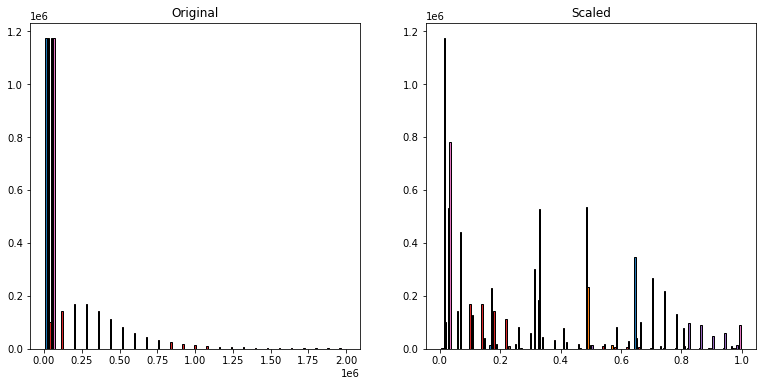

In [36]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(zillow_train)

zillow_train_scaled = scaler.transform(zillow_train)
zillow_validate_scaled = scaler.transform(zillow_validate)
zillow_test_scaled = scaler.transform(zillow_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(zillow_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(zillow_train_scaled, bins=25, ec='black')
plt.title('Scaled')


In [47]:
zillow_trpd.DataFrame(zillow_train_scaled, columns = zillow_train.columns.values)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.500000,0.333333,0.002916,0.178516,0.744186,0.047274,0.000000
1,0.500000,0.583333,0.003387,0.143884,0.906977,0.029884,0.297297
2,0.500000,0.333333,0.002901,0.294375,0.567442,0.077232,0.000000
3,0.500000,0.166667,0.002122,0.145489,0.702326,0.038724,0.000000
4,0.000000,0.166667,0.000744,0.017260,0.655814,0.006076,0.000000
...,...,...,...,...,...,...,...
1172961,0.500000,0.416667,0.004630,0.231666,0.767442,0.055477,0.297297
1172962,0.333333,0.250000,0.002241,0.258892,0.865116,0.057308,0.297297
1172963,0.500000,0.333333,0.003302,0.239030,0.665116,0.061935,0.000000
1172964,0.500000,0.166667,0.002235,0.036479,0.679070,0.005036,0.000000


In [48]:
zillow_train_scaled.set_index([zillow_train.index.values])

AttributeError: 'numpy.ndarray' object has no attribute 'set_index'

**Standard Scaling**

Text(0.5, 1.0, 'Scaled')

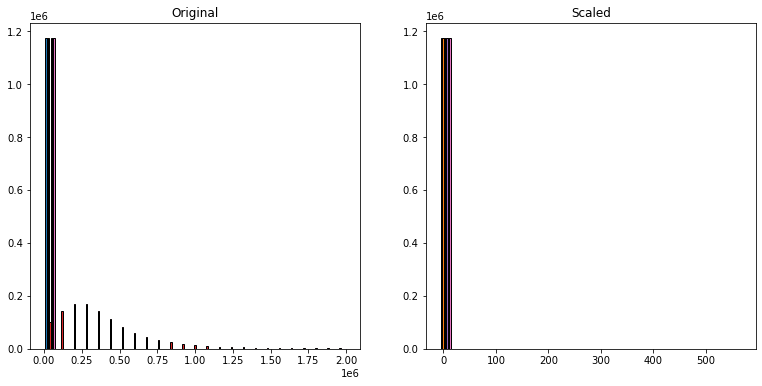

In [37]:
stdscaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
stdscaler.fit(zillow_train)

zillow_train_stdscaled = stdscaler.transform(zillow_train)
zillow_validate_stdscaled = stdscaler.transform(zillow_validate)
zillow_test_stdscaled = stdscaler.transform(zillow_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(zillow_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(zillow_train_stdscaled, bins=25, ec='black')
plt.title('Scaled')


**Robust Scaling**

Text(0.5, 1.0, 'Scaled')

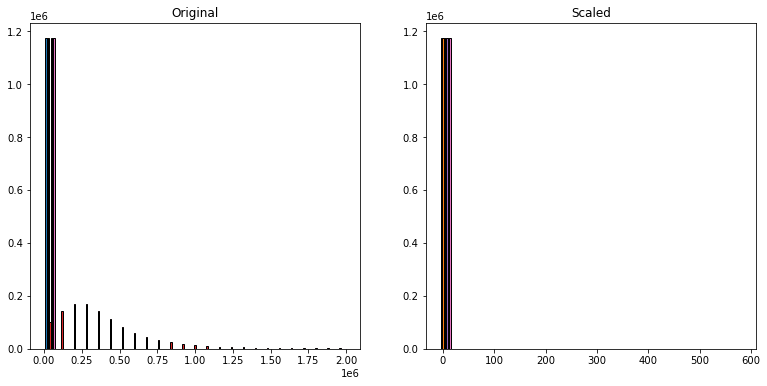

In [38]:
rscaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
rscaler.fit(zillow_train)

zillow_train_rscaled = rscaler.transform(zillow_train)
zillow_validate_rscaled = rscaler.transform(zillow_validate)
zillow_test_rscaled = rscaler.transform(zillow_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(zillow_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(zillow_train_rscaled, bins=25, ec='black')
plt.title('Scaled')


***Inverse Transform***

In [43]:
std_scaleback = stdscaler.inverse_transform(zillow_train)

Text(0.5, 1.0, 'Scaled Inverse')

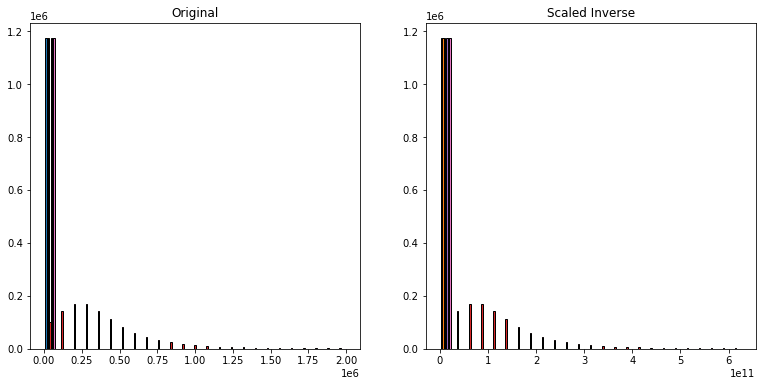

In [45]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(zillow_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(std_scaleback, bins=25, ec='black')
plt.title('Standard Scaled Inverse')
